In [102]:
import pandas as pd
from matplotlib import pyplot as plt 

In [103]:
pd.set_option('display.max_columns', None)

In [104]:
df = pd.read_csv("data/INSTALA_INCIDENT_firstpart.csv")

In [105]:
df.columns = [x.lower().replace(" ","_") for x in df.columns]

In [106]:
df.loc[df.id_1.isnull(), "incident"] = 0
df.loc[-(df.id_1.isnull()), "incident"] = 1

In [107]:
df = df.loc[- (df.region.isin(['PA','re']))]

## corr region

In [108]:
# df.region =df.region.astype("int64")

In [109]:
df_total = df[["incident", "region"]].groupby(by="region").value_counts()                                                                                                                          

In [110]:
df_pourcentage = df[["incident", "region"]].groupby(by="region").sum()

In [111]:
df_pourcentage['total'] = df_total.groupby(by="region").sum()

In [112]:
df_pourcentage["pourcentage_incidents"] = df_pourcentage.incident * 100 / df_pourcentage.total

<BarContainer object of 92 artists>

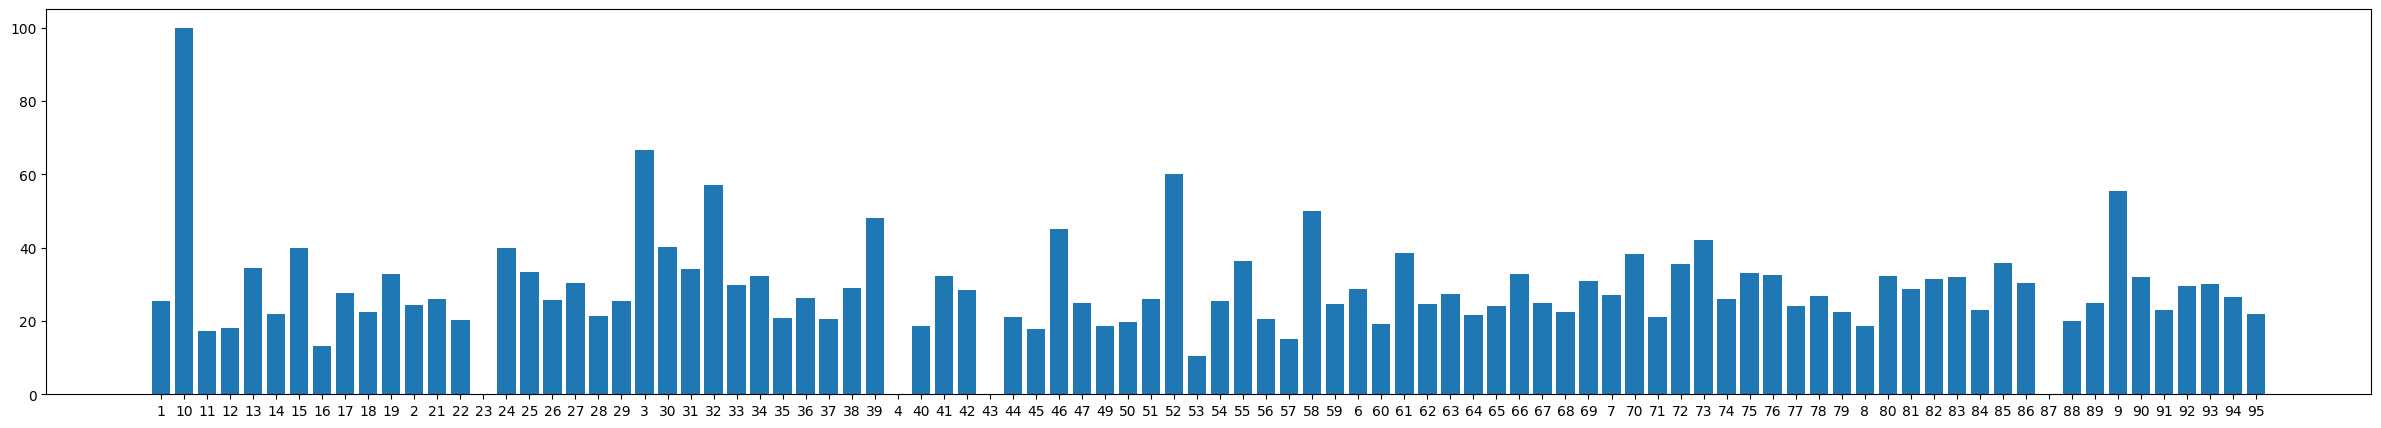

In [113]:
fig = plt.figure(figsize=(30,5))
plt.bar(df_pourcentage.pourcentage_incidents.index, df_pourcentage.pourcentage_incidents)

## corr periode

In [114]:
df.creation_date = pd.to_datetime(df.creation_date)

In [115]:
df['month'] = df.creation_date.dt.month
df['year'] = df.creation_date.dt.year
df['day'] = df.creation_date.dt.day

<BarContainer object of 12 artists>

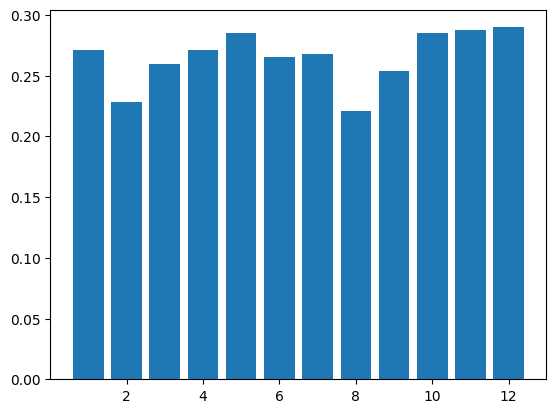

In [116]:
plt.bar(df[["month", "incident"]].groupby(by="month").mean().index, df[["month", "incident"]].groupby(by="month").mean().incident)

<BarContainer object of 5 artists>

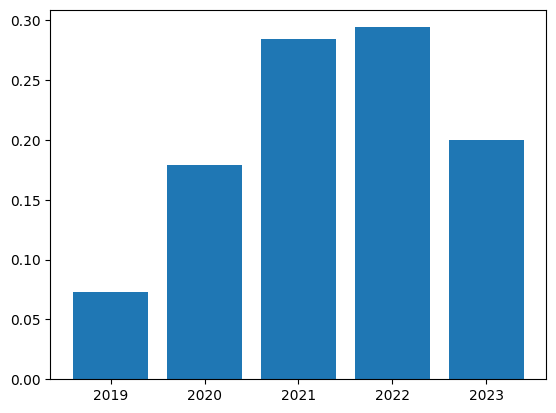

In [126]:
plt.bar(df[["year", "incident"]].groupby(by="year").mean().index, df[["year", "incident"]].groupby(by="year").mean().incident)

## product

### rayon

<BarContainer object of 9 artists>

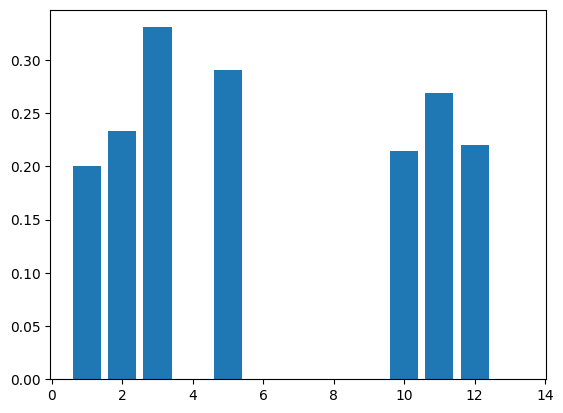

In [125]:
plt.bar(df[["cod_ray","incident"]].groupby("cod_ray").mean().index,df[["cod_ray","incident"]].groupby("cod_ray").mean().incident)